In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

def show_image_with_label(df, index=None):
    if index is None:
        index = random.randint(0, len(df) - 1)
    
    label = df.iloc[index, 0]
    pixels = df.iloc[index, 1:].values
    image = pixels.reshape(28, 28)
    
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label} (Index: {index})")
    plt.axis('off')
    plt.show()


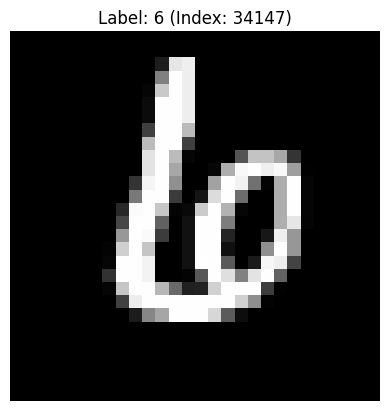

In [4]:
show_image_with_label(df)

In [5]:
def show_all_numbers(df):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    unique_labels = df['label'].unique()
    
    for i, label in enumerate(sorted(unique_labels)):
        image_data = df[df['label'] == label].iloc[0, 1:].values
        image = image_data.reshape(28, 28)
        
        ax = axes[i // 5, i % 5]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


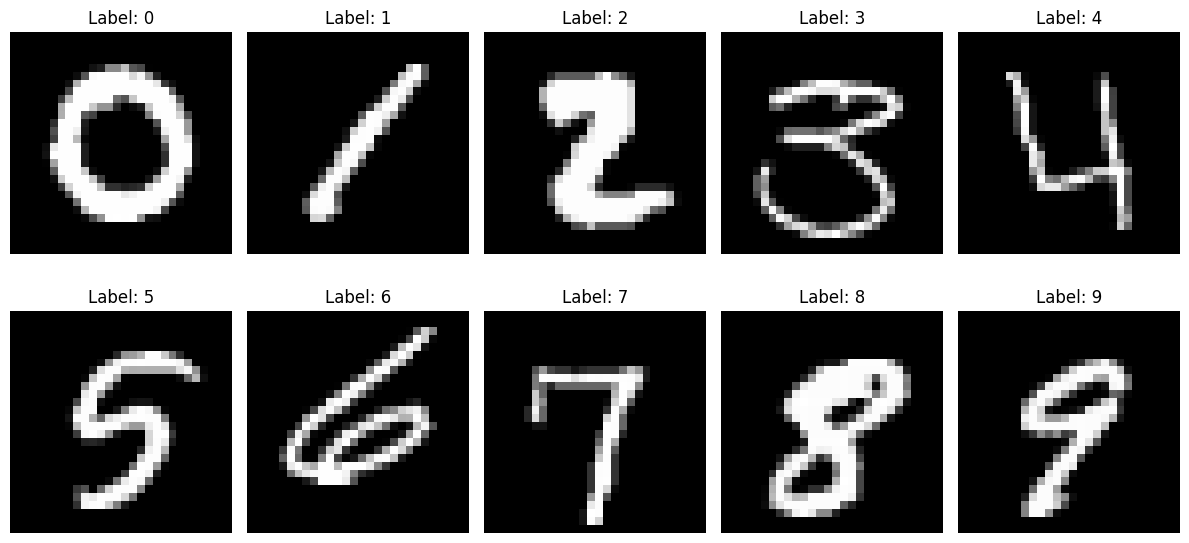

In [6]:
show_all_numbers(df)

In [7]:
def show_first_n_images(df, number, n):
    images = df[df['label'] == number].iloc[:n, 1:].values
    
    rows = (n + 4) // 5
    fig, axes = plt.subplots(rows, 5, figsize=(15, 3 * rows))
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            image = images[i].reshape(28, 28)
            ax.imshow(image, cmap='gray')
            ax.set_title(f"Label: {number}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

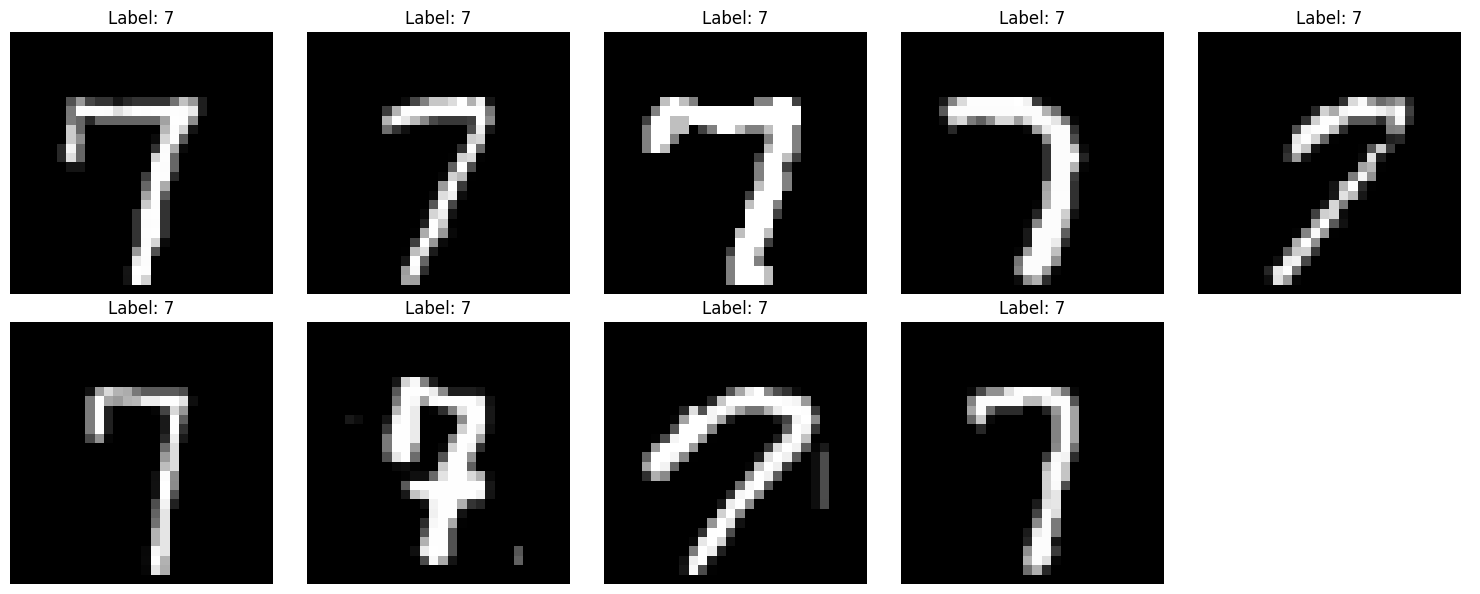

In [8]:
show_first_n_images(df, 7, 9)

In [9]:
def show_average_representations(df):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    unique_labels = df['label'].unique()
    
    for i, label in enumerate(sorted(unique_labels)):
        images = df[df['label'] == label].iloc[:, 1:].values
        avg_image = images.mean(axis=0).reshape(28, 28)
        
        ax = axes[i // 5, i % 5]
        ax.imshow(avg_image, cmap='gray')
        ax.set_title(f"Avg Label: {label}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

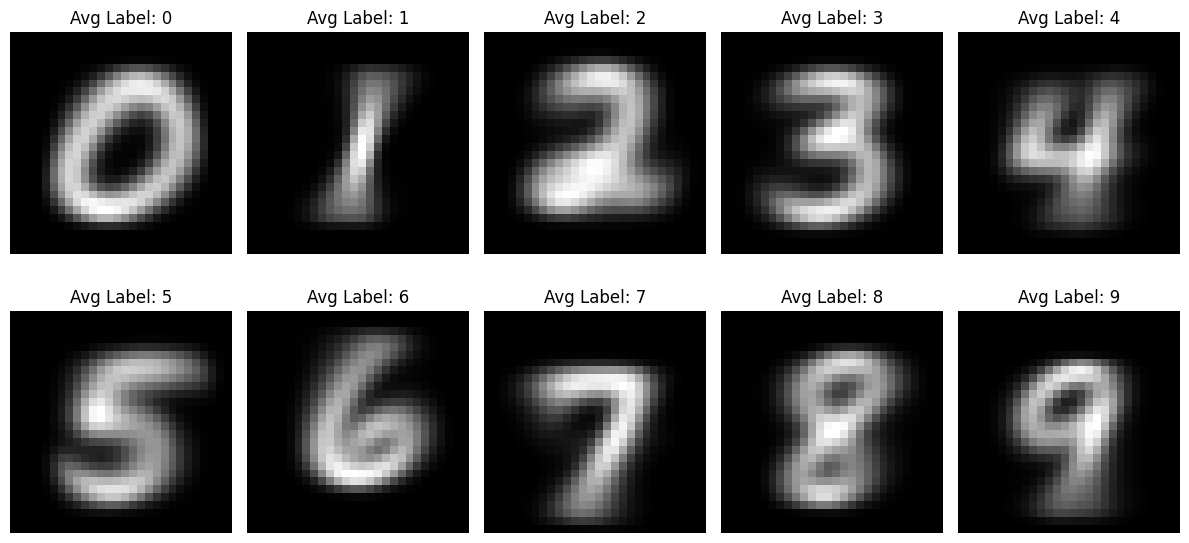

In [10]:
show_average_representations(df)

In [11]:
def train_digit_recognizer(df):
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return model


In [12]:
model = train_digit_recognizer(df)

Model Accuracy: 0.9654761904761905
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.98      0.99      0.99       909
           2       0.97      0.96      0.97       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.97      0.98      0.98       785
           7       0.97      0.95      0.96       893
           8       0.96      0.96      0.96       835
           9       0.94      0.94      0.94       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [13]:
def predict_digit_from_image(model, image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((28, 28))
    image_data = np.array(image).flatten()
    
    image_data = image_data / 255.0 * 255

    prediction = model.predict([image_data])[0]
    confidence = max(model.predict_proba([image_data])[0])
    
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {prediction} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

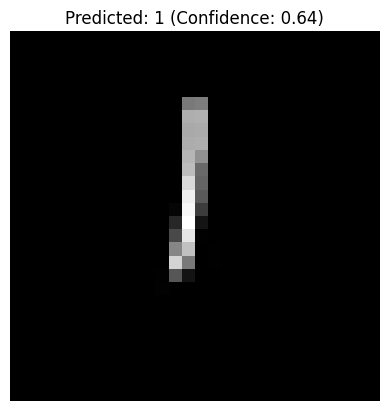

In [14]:
predict_digit_from_image(model, 'my_image.jpg')